# Playing with P-values

## Recall some definitions 

* $H_0$ : null hypothesis: The hypotheis that the effect we are testing for is null

* $H_A$ : alternative hypothesis : Not $H_0$, so there is some signal

* $T$ : The random variable that takes value "significant" or "not significant"

* $T_S$ : Value of T when test is significant (eg $T = T_S$)

* $T_N$ : Value of T when test is not significant (eg $T = T_N$)

* $\alpha$ : false positive rate - probability to reject $H_0$ when $H_0$ is true (therefore $H_A$ is false)

* $\beta$ : false negative rate - probability to accept $H_0$ when $H_A$ is true (i.e. $H_0$ is false)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as sst

## Step 1: Generate N samples from the normal distribution

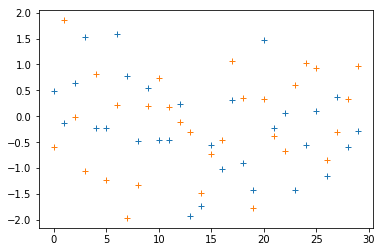

In [3]:
# define the normal 0,1 object
norm01 = sst.norm(0,1)
# Let's fix the seed of the random generator
np.random.seed(42) # 42 is arbitrary 
# Draw from the normal:
# norm01 has a "random variables" function drawing from this distribution
# and returns a numpy array of a given size
sample = norm01.rvs(size=(30,))
plt.plot(sample,'+')
sample = norm01.rvs(size=(30,))
plt.plot(sample,'+')

## Is the mean significant? 

In [4]:
# compute mean and corrected standard deviation
sample_mean = sample.mean()
sample_std = sample.std()
N = len(sample)

std_corrected = np.sqrt((sample**2 - sample_mean**2).sum()/(N-1))

# take into account the "N-1" since 1 degrees of freedome has been used 
# to estimate the mean
# assert not np.isclose(std_corrected, sample_std)
assert np.isclose(std_corrected, np.sqrt(np.var(sample,ddof=1)))

# compute t statistics
t_value = sample_mean / (std_corrected/np.sqrt(N))

#t_statistics = sample_mean / 

In [5]:
# test it against the null : make a central t distribution 
central_t = sst.t(loc=0,scale=1,df=N-1)

significance_thr = 0.05

# use the survival function
pvalue = central_t.sf(t_value)
print("This is our p-value : {}".format(pvalue))

if pvalue < significance_thr:
    print("OMG, I have a result")
else:
    print("Not good enough, continue p-hacking")

This is our p-value : 0.7591488146556591
Not good enough, continue p-hacking


## Estimate the chance that our p-value is significant under the null:

In [14]:
print(norm01.rvs(size=(2,)))

[-0.47917424 -0.18565898]


In [15]:
# create a function that generate a p-value when data are from N(0,1)

def yield_a_pvalue(distrib, N=30):
    """
    Parameters
    ----------
    distrib:  distribution object(eg, norm(0,1))
        a scipy.stats distribution 
    
    Returns
    -------
    A p-value
    """
    sample = distrib.rvs(size=(N,))
    sample_mean = sample.mean()
    std_corrected = np.sqrt(np.var(sample, ddof=1))

    # compute t statistics
    t_value = sample_mean / (std_corrected/np.sqrt(N))
    
    return sst.t.sf(t_value, df=N-1)


In [16]:
# On average: 20 
nb_of_test_needed = 0
while yield_a_pvalue(norm01) > significance_thr:
    nb_of_test_needed += 1
print(nb_of_test_needed)

8


In [17]:
N_pval = 1000
pvalues = np.asarray([yield_a_pvalue(sst.norm(0,1)) for i in range(N_pval)])
number_significant = (pvalues <= significance_thr).sum()
print("We have {} tests significant over {} trials, ie {}%"
              .format(number_significant, N_pval, 100*number_significant/N_pval))


We have 53 tests significant over 1000 trials, ie 5.3%


## With some signal

In [18]:
def launch_a_bunch_of_tests(distrib, N_pval=1000, N=30):
    """
    launches a series of sampling and then t tests on these (testing if the mean is > 0)
    
    Parameters:
    -----------
    distrib: the sampling distribution
    N_pval: number of p-value to compute
    N : the sample size
    """
    pvalues = np.asarray([yield_a_pvalue(distrib) for i in range(N_pval)])
    number_significant = (pvalues <= significance_thr).sum()
    print("We have {} tests significant over {} trials, ie {}%"
                  .format(number_significant, N_pval, 100*number_significant/N_pval))


# Demonstrate that the test depends only on the signal to noise ratio, not the effect size
    
# case 1: m=1.65, sigma=1
#---------------------------
loc, scale = (1.65/np.sqrt(N), 1)
distrib = sst.norm(loc, scale)
launch_a_bunch_of_tests(distrib)
# case 1: m=0.165, sigma=0.1
#---------------------------
loc, scale = (0.165/np.sqrt(N), 0.1)
distrib = sst.norm(loc, scale)
launch_a_bunch_of_tests(distrib)



We have 491 tests significant over 1000 trials, ie 49.1%
We have 491 tests significant over 1000 trials, ie 49.1%
